In [1]:
! eups list -s | grep lsst_distrib

eups                  LOCAL:/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2022_01/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0-ext/eups 	setup
lsst_distrib          g7ae64ea4b3+830bbabcd1 	current w_latest w_2022_01 setup


In [2]:
import os
import numpy as np
import glob
from astropy.io import fits
import pickle as pkl
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage
from lsst.obs.lsst import LsstCam
from lsst.afw.cameraGeom.utils import findAmp
from lsst.geom import Point2I
from astropy.table import Table, vstack, join
from scipy import stats
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

repo_path = "/sdf/group/lsst/camera/IandT/repo_gen3/BOT_data/butler.yaml"

butler = Butler(repo_path)
registry = butler.registry

In [136]:
col1 = 'u/abrought/BF/run_13230/R02_S00/uncorrected'
col2 = 'u/abrought/BF/run_13231/R02_S00/uncorrected'
col = [col1,col2]
    
subbutler = Butler(repo_path,collections=col)
subregistry = subbutler.registry

datasetRefs = list(subregistry.queryDatasets(datasetType="postISRCCD", collections=col))
print(len(datasetRefs))
exptimes = []
sky = []
for i,aref in enumerate(datasetRefs):
    print(i,"/",len(datasetRefs))
    
    # Get spot catalog
    # src = subbutler.get("gridSpotSrc",dataId=aref.dataId)
    # mdsrc = src.getMetadata()

    # Get the raw image
    raw = subbutler.get("raw",dataId=aref.dataId)
    mdraw = raw.getMetadata()
    if mdraw["SEQNUM"] in [649,499,724,574,1012,812,1112,912]:
        continue

    # Get the processed image
    postisr = subbutler.get("postISRCCD",dataId=aref.dataId)
    #mdpostisr = postisr.getMetadata()
    image = postisr.getImage().getArray()

    n, bins = np.histogram(image[image < 6000.].ravel(), bins=600)
    peaks, properties = find_peaks(gaussian_filter(n, 5))
    
    if len(peaks) == 0:
        continue
    print(mdraw["EXPTIME"], bins[peaks])
    exptimes.append(mdraw["EXPTIME"])
    sky.append(bins[peaks])


# Flux cuts
#maxFlux = np.nanmax(src['base_SdssShape_instFlux'])
#select = src['base_SdssShape_instFlux'] >= 0.95*maxFlux
#src  = src.subset(select)

# Get only points with a good grid fit:
#ymask = (np.abs(src['base_SdssCentroid_y'] - src['spotgrid_y'])<2)
#xmask = (np.abs(src['base_SdssCentroid_x'] - src['spotgrid_x'])<2)
#mask3 = xmask & ymask

# Get only the circular spots (removes elliptical spots as well as spots w/ trail bleeding)
#g1 = src['base_SdssShape_xx']-src['base_SdssShape_yy']
#g2 = 2*src['base_SdssShape_xy']
#ellpticities = np.sqrt(g1**2 + g2**2)

#mask2 = (ellpticities < 0.7)

# Center cuts
#maxradius = 15.*np.mean([mdsrc["GRID_XSTEP"], mdsrc["GRID_YSTEP"]])
#distances = np.sqrt((src["spotgrid_x"] - x0)**2 + (src["spotgrid_y"] - y0)**2)
#mask1 = (distances < maxradius)

# NaN cuts
#mask0 = (src['spotgrid_index'] >= 0)

#src = src[mask0 & mask3]
#src = src[mask0 & mask3]

# Get the position of a random nth spot
#n=1200
# = int(src['base_SdssCentroid_x'][np.argwhere(src['spotgrid_index'] == n)]) # The coordinate systems are flipped
#y = int(src['base_SdssCentroid_y'][np.argwhere(src['spotgrid_index'] == n)])
#print(src['base_PsfFlux_instFlux'][np.argwhere(src['spotgrid_index'] == n)])

#from matplotlib.colors import LogNorm
#plt.figure(figsize=(12,11))
#plt.imshow(image, norm=LogNorm())
#plt.colorbar()

700
0 / 700
28.0 [4.4385394e-01 3.3233850e+03]
1 / 700
22.0 [   5.7585196 1774.6758    2613.648     5454.0234   ]
2 / 700
30.0 [-1.2870864e+00  2.4133621e+03  3.4842942e+03  5.4847148e+03]
3 / 700
40.0 [2.3523673e-02 2.9696807e+03 3.1211936e+03 3.5858340e+03 4.6666274e+03
 4.8383423e+03]
4 / 700
32.0 [7.1863246e-01 2.3679968e+03 2.6512610e+03 3.6932678e+03 3.8551331e+03]
5 / 700
28.0 [-2.1178138e+00  2.2916060e+03  3.3626841e+03]
6 / 700
22.0 [   6.7369866 2593.9717    5120.5684    5595.5684    5797.696    ]
7 / 700
14.0 [   5.842347 1643.3165   4008.5571   4443.1953   5211.393    5443.874   ]
8 / 700
28.0 [5.5886974e+00 3.3515305e+03 5.8685684e+03]
9 / 700
16.0 [5.5137095e+00 1.8958188e+03 3.6344951e+03 4.3522046e+03 4.9688281e+03
 5.2417603e+03 5.8381665e+03]
10 / 700
28.0 [-1.7873011e+00  1.9684198e+03  2.3321504e+03  3.2919949e+03]
11 / 700
28.0 [-4.7259545e-01  2.0198585e+03  2.2825015e+03  3.3027688e+03
  5.3837095e+03  5.7776743e+03]
12 / 700
14.0 [5.1001043e+00 1.6529381e+03 5.

t > 8.75 118.10588217345476


Text(0, 0.5, 'Central sky background [e-/px/s] ')

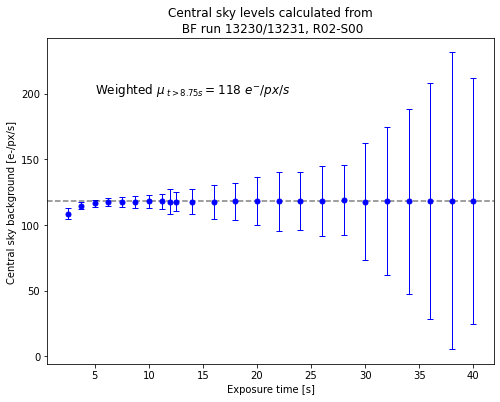

In [137]:
e = []
bkg = []
for t,skies in zip(exptimes,sky):
    #plt.scatter(np.full(skies.shape, t), skies)
    e.extend(np.full(skies.shape, t))
    bkg.extend(skies)

e = np.asarray(e)
bkg = np.asarray(bkg)
m = 120.
b = -20.
mask2 = (np.abs(bkg - (m*e + b)) < 750.) * (bkg > 10)
plt.figure(figsize=(8,6))
w = []
b = []
for t in sorted(np.unique(e[mask2])):
    plt.errorbar(np.mean(e[mask2][e[mask2] == t]),np.mean(bkg[mask2][e[mask2] == t]) / np.mean(e[mask2][e[mask2] == t]) ,yerr=np.std(bkg[mask2][e[mask2] == t]), fmt="o", color="b", markersize=5, capsize=3, elinewidth=1)
    w.append(np.std(bkg[mask2][e[mask2] == t]))
    b.append(np.mean(bkg[mask2][e[mask2] == t]) / np.mean(e[mask2][e[mask2] == t]))

w = np.asarray(w)
b = np.asarray(b)
weights = 1.0 - (w / np.sum(w))
plt.axhline(np.average( b[5:], weights=weights[5:]), linestyle="--", color="k", alpha=0.5)

print("t >", sorted(np.unique(e[mask2]))[5], np.average( b[5:], weights=weights[5:]))

plt.title("Central sky levels calculated from\n BF run 13230/13231, R02-S00")
plt.text(5,200,r"Weighted $\mu_{\;t > 8.75s} = $118 $e^{-}/px/s$", fontsize=12)
plt.xlabel("Exposure time [s]")
plt.ylabel("Central sky background [e-/px/s] ")

#plt.plot(np.asarray([1,15]), 120*np.asarray([1,15]) - 20 , "k--", alpha=0.5)

400
1 / 400
No peaks


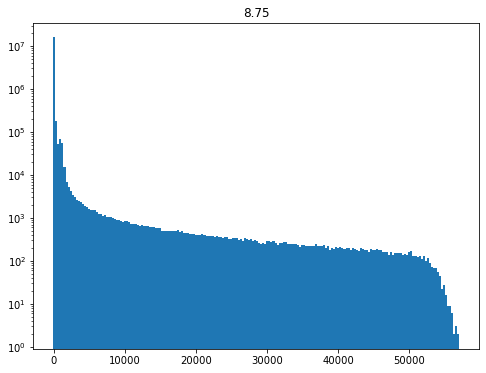

In [135]:
col1 = 'u/abrought/BF/run_13230/R02_S00/uncorrected'
col2 = 'u/abrought/BF/run_13231/R02_S00/uncorrected'
col = [col1,col2]
    
subbutler = Butler(repo_path,collections=col)
subregistry = subbutler.registry

datasetRefs = list(subregistry.queryDatasets(datasetType="postISRCCD", collections=col2))
print(len(datasetRefs))
exptimes = []
sky = []
for i,aref in enumerate([datasetRefs[5]]):
    print(i+1,"/",len(datasetRefs))
        
    # Get spot catalog
    # src = subbutler.get("gridSpotSrc",dataId=aref.dataId)
    # mdsrc = src.getMetadata()

    # Get the raw image
    raw = subbutler.get("raw",dataId=aref.dataId)
    mdraw = raw.getMetadata()


    # Get the processed image
    postisr = subbutler.get("postISRCCD",dataId=aref.dataId)
    #mdpostisr = postisr.getMetadata()
    image = postisr.getImage().getArray()
    plt.figure(figsize=(8,6))
    plt.title(mdraw['EXPTIME'])

    n, bins, _ = plt.hist(image.ravel(), bins=200, log=True)
    peaks, properties = find_peaks(gaussian_filter(n, 5))

    if len(peaks) == 0:
        print('No peaks')
        continue
        
    print(bins[peaks][-1])
    for p in bins[peaks]:
        plt.axvline(p, color="orange", linestyle="--")
    plt.axvline(225)
        
    plt.figure(figsize=(14,14))
    mask4 = (image >= 225-10)
    mask5 = (image <= 225+10)
    
    image2 = np.full(image.shape, np.nan)
    image2[mask4 * mask5] = image[mask4 * mask5]
    im = plt.imshow(mask4 * mask5, cmap="binary")
    from matplotlib.colors import LogNorm
    plt.colorbar(im)
    


    #n, bins = np.histogram(image[image < 6000.].ravel(), bins=600)
    #plt.hist(image[image < 6000.].ravel(), bins=600)
    #peaks, properties = find_peaks(gaussian_filter(n, 5))
    #plt.axvline(peaks)
    

    print(mdraw["EXPTIME"], bins[peaks])
    exptimes.append(mdraw["EXPTIME"])
    sky.append(bins[peaks])

    
    

# Flux cuts
#maxFlux = np.nanmax(src['base_SdssShape_instFlux'])
#select = src['base_SdssShape_instFlux'] >= 0.95*maxFlux
#src  = src.subset(select)

# Get only points with a good grid fit:
#ymask = (np.abs(src['base_SdssCentroid_y'] - src['spotgrid_y'])<2)
#xmask = (np.abs(src['base_SdssCentroid_x'] - src['spotgrid_x'])<2)
#mask3 = xmask & ymask

# Get only the circular spots (removes elliptical spots as well as spots w/ trail bleeding)
#g1 = src['base_SdssShape_xx']-src['base_SdssShape_yy']
#g2 = 2*src['base_SdssShape_xy']
#ellpticities = np.sqrt(g1**2 + g2**2)

#mask2 = (ellpticities < 0.7)

# Center cuts
#maxradius = 15.*np.mean([mdsrc["GRID_XSTEP"], mdsrc["GRID_YSTEP"]])
#distances = np.sqrt((src["spotgrid_x"] - x0)**2 + (src["spotgrid_y"] - y0)**2)
#mask1 = (distances < maxradius)

# NaN cuts
#mask0 = (src['spotgrid_index'] >= 0)

#src = src[mask0 & mask3]
#src = src[mask0 & mask3]

# Get the position of a random nth spot
#n=1200
# = int(src['base_SdssCentroid_x'][np.argwhere(src['spotgrid_index'] == n)]) # The coordinate systems are flipped
#y = int(src['base_SdssCentroid_y'][np.argwhere(src['spotgrid_index'] == n)])
#print(src['base_PsfFlux_instFlux'][np.argwhere(src['spotgrid_index'] == n)])

#from matplotlib.colors import LogNorm
#plt.figure(figsize=(12,11))
#plt.imshow(image, norm=LogNorm())
#plt.colorbar()